# HDD Dataset data cleanign and pre-processing

Load the dataset created out of failed devices in 4Q of original dataset.
- selective loading the important features [based on field learning and referenced in various Research papers]
- selective loading only the raw values of features.
- Normalizing the raw values under min-max or Robust Scaler

In [1]:
# Data Preprocessing Template
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

create a list of data features which are important and considered as part of Prior art work

In [2]:
column_list = []
column_list.append('date')
column_list.append('failure')
column_list.append('model')
column_list.append('serial_number')
column_list.append('smart_5_raw')
column_list.append('smart_9_raw')
column_list.append('smart_184_raw')
column_list.append('smart_187_raw')
column_list.append('smart_193_raw')
column_list.append('smart_197_raw')
column_list.append('smart_198_raw')
column_list.append('smart_240_raw')
column_list.append('smart_241_raw')
column_list.append('smart_242_raw')

In [3]:
# Load the pre-created dataset into a pandas dataframe and select the columns

df = pd.read_parquet('/nobackup/amimalik/bits/dataset/dimensions/4Q/failed_devices_df_all.parquet', columns=column_list)

#reset the index and drop old index
df.reset_index(drop=True, inplace=True)


In [4]:
df.shape

(689455, 14)

In [5]:
df.head()

,date,failure,model,serial_number,smart_5_raw,smart_9_raw,smart_184_raw,smart_187_raw,smart_193_raw,smart_197_raw,smart_198_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2023-04-13,0.0,ST4000DM000,W300R8BM,0.0,69104.0,0.0,0.0,11874.0,0.0,0.0,69065.0,6.313640e+10,3.751740e+11
1,2023-04-16,0.0,ST4000DM000,Z302BN64,0.0,71397.0,0.0,0.0,56662.0,0.0,0.0,71195.0,7.817508e+10,4.160596e+11
2,2023-10-14,0.0,ST4000DM000,Z302A194,0.0,71383.0,0.0,0.0,54425.0,0.0,0.0,71194.0,7.787505e+10,4.734269e+11
3,2023-04-16,0.0,ST4000DM000,Z302ALE1,0.0,71392.0,0.0,0.0,56824.0,0.0,0.0,71199.0,7.733693e+10,6.256444e+11
4,2023-10-17,0.0,ST4000DM000,Z302B0W7,0.0,71390.0,0.0,0.0,57077.0,0.0,0.0,71190.0,7.561152e+10,5.654197e+11


In [6]:
# find the serial numbers of the drive by counting the number of samples for each serial number appears in the dataset
serial_number_counts = df['serial_number'].value_counts()

In [7]:
serial_number_counts

serial_number
6190A04AF97G    364
ZL22ZHME        364
9860A01HF97G    363
ZHZ3P3GX        363
87DFWOG8T       363
               ... 
70K0A08ZF97G      1
8160A1GEFVKG      1
Z304NT6A          1
ZL24QC7A          1
43E0A015FVKG      1
Name: count, Length: 4406, dtype: int64

In [8]:
serial_number_counts.describe()

count    4406.000000
mean      156.480935
std       107.548077
min         1.000000
25%        54.000000
50%       150.000000
75%       243.000000
max       364.000000
Name: count, dtype: float64

Default working dataset would be made of dataframe containing serial_number_counts mean value [150] samples for each serial number for model training and test.

In [9]:
# Group the instances dataframe by serial number
grouped_instances = df.groupby('serial_number')

# Create an empty list to store the last 150 samples for each serial number
last_n = []

# Iterate over each group
for name, group in grouped_instances:
    # Get the last n (150) samples for the current serial number
    last_n_group = group.tail(150)
    # Append the last n samples to the list
    last_n.append(last_n_group)

# Concatenate the list of dataframes into a single dataframe
instance_last_n = pd.concat(last_n)

# Reset the index of the dataframe
instance_last_n.reset_index(drop=True, inplace=True)

# Drop the date column from the dataframe
instance_last_n.drop(columns=['date'], inplace=True)

# Print the updated dataframe
instance_last_n.head()

,failure,model,serial_number,smart_5_raw,smart_9_raw,smart_184_raw,smart_187_raw,smart_193_raw,smart_197_raw,smart_198_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG,432.0,21843.0,NaN,NaN,246.0,NaN,0.0,NaN,1.004960e+11,3.744333e+11
1,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG,432.0,21864.0,NaN,NaN,246.0,NaN,0.0,NaN,1.005508e+11,3.746520e+11
2,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG,432.0,21892.0,NaN,NaN,246.0,NaN,0.0,NaN,1.006277e+11,3.750101e+11
3,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG,432.0,21913.0,NaN,NaN,246.0,NaN,0.0,NaN,1.006664e+11,3.753303e+11
4,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG,432.0,21941.0,NaN,NaN,246.0,NaN,0.0,NaN,1.006970e+11,3.757501e+11


In [10]:
instance_last_n.shape

(469625, 13)

In [11]:
# create a local copy of dataset for further processing
ddf = instance_last_n.copy()

In [12]:
ddf.columns

Index(['failure', 'model', 'serial_number', 'smart_5_raw', 'smart_9_raw',
       'smart_184_raw', 'smart_187_raw', 'smart_193_raw', 'smart_197_raw',
       'smart_198_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [13]:
raw_columns = [col for col in ddf.columns if 'raw' in col]

implement the MinMaxScaler to normalize the features *_raw

In [14]:
scaler = MinMaxScaler()
scaler.fit(ddf[raw_columns])
normalized_data = scaler.transform(ddf[raw_columns])
normalized_data = pd.DataFrame(normalized_data, columns=raw_columns)

# Drop the raw columns from the original dataframe and combine the normalized data with the original dataframe
combined_df = pd.concat([normalized_data, ddf.drop(columns=raw_columns)], axis=1)

# rename the columns with raw to normalized
combined_df.columns = combined_df.columns.str.replace('_raw', '_norm')


combined_df.head()

,smart_5_norm,smart_9_norm,smart_184_norm,smart_187_norm,smart_193_norm,smart_197_norm,smart_198_norm,smart_240_norm,smart_241_norm,smart_242_norm,failure,model,serial_number
0,0.006593,0.270569,NaN,NaN,0.001006,NaN,0.0,NaN,0.357132,0.039319,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG
1,0.006593,0.270829,NaN,NaN,0.001006,NaN,0.0,NaN,0.357326,0.039342,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG
2,0.006593,0.271176,NaN,NaN,0.001006,NaN,0.0,NaN,0.357600,0.039379,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG
3,0.006593,0.271436,NaN,NaN,0.001006,NaN,0.0,NaN,0.357737,0.039413,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG
4,0.006593,0.271782,NaN,NaN,0.001006,NaN,0.0,NaN,0.357846,0.039457,0.0,TOSHIBA MG07ACA14TEY,1050A0C7F9RG


Rename the features based on their original name from SMART attributes

In [15]:
combined_df.rename(columns={'failure':'failure', 'smart_5_norm':'Reallocated_Sectors_Count', 'smart_9_norm':'Power-On_Hours',
                    'smart_184_norm':'I/O_Error_Detection_and_Correction','smart_187_norm':'Reported_Uncorrectable_Errors', 
                    'smart_193_norm':'Load_Unload_Cycle', 'smart_197_norm':'Current_Pending_Sector_Count', 'smart_198_norm':'Offline_Uncorrectable',
                    'smart_240_norm':'Head_Flying_Hours', 'smart_241_norm':'Total_LBAs_Written', 'smart_242_norm':'Total_LBAs_Read'}, inplace=True)

In [16]:
ddf = combined_df.copy()

In [17]:
ddf['failure'] = ddf['failure'].astype(int)

ddf.dtypes

Reallocated_Sectors_Count             float64
Power-On_Hours                        float64
I/O_Error_Detection_and_Correction    float64
Reported_Uncorrectable_Errors         float64
Load_Unload_Cycle                     float64
Current_Pending_Sector_Count          float64
Offline_Uncorrectable                 float64
Head_Flying_Hours                     float64
Total_LBAs_Written                    float64
Total_LBAs_Read                       float64
failure                                 int64
model                                  object
serial_number                          object
dtype: object

In [18]:
print(ddf.isnull().sum())

Reallocated_Sectors_Count               1777
Power-On_Hours                           166
I/O_Error_Detection_and_Correction    342301
Reported_Uncorrectable_Errors         179415
Load_Unload_Cycle                       6037
Current_Pending_Sector_Count           13765
Offline_Uncorrectable                   2751
Head_Flying_Hours                      97284
Total_LBAs_Written                    161429
Total_LBAs_Read                       161429
failure                                    0
model                                      0
serial_number                              0
dtype: int64


Save the dataframe as a working copy to be used across other model processing

In [19]:
#reset the index and drop old index
ddf.reset_index(drop=True, inplace=True)
ddf.to_parquet("/nobackup/amimalik/bits/dataset/dimensions/4Q/working_dataset.parquet")

# correlation matrix

Drop the columms which can be used for correlation matrix

In [20]:
drop_column_list = []
drop_column_list.append('model')
drop_column_list.append('serial_number')
ddf = ddf.drop(drop_column_list, axis=1)

In [21]:
ddf.columns

Index(['Reallocated_Sectors_Count', 'Power-On_Hours',
       'I/O_Error_Detection_and_Correction', 'Reported_Uncorrectable_Errors',
       'Load_Unload_Cycle', 'Current_Pending_Sector_Count',
       'Offline_Uncorrectable', 'Head_Flying_Hours', 'Total_LBAs_Written',
       'Total_LBAs_Read', 'failure'],
      dtype='object')

In [22]:
ddf.describe()

,Reallocated_Sectors_Count,Power-On_Hours,I/O_Error_Detection_and_Correction,Reported_Uncorrectable_Errors,Load_Unload_Cycle,Current_Pending_Sector_Count,Offline_Uncorrectable,Head_Flying_Hours,Total_LBAs_Written,Total_LBAs_Read,failure
count,467848.000000,469459.000000,127324.000000,290210.000000,463588.000000,455860.000000,466874.000000,372341.000000,308196.000000,308196.000000,469625.000000
mean,0.021040,0.437417,0.000202,0.001252,0.051912,0.000192,0.000162,0.412648,0.349281,0.046574,0.009382
std,0.095983,0.224601,0.008749,0.024536,0.102050,0.005207,0.005118,0.307221,0.106964,0.036772,0.096405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.280082,0.000000,0.000000,0.004243,0.000000,0.000000,0.173660,0.291030,0.035849,0.000000
50%,0.000000,0.392964,0.000000,0.000000,0.007624,0.000000,0.000000,0.381374,0.359459,0.046457,0.000000
75%,0.000382,0.641311,0.000000,0.000198,0.036546,0.000002,0.000000,0.709693,0.393029,0.052560,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Identify the nulls on the features

In [23]:
print(ddf.isnull().sum())

Reallocated_Sectors_Count               1777
Power-On_Hours                           166
I/O_Error_Detection_and_Correction    342301
Reported_Uncorrectable_Errors         179415
Load_Unload_Cycle                       6037
Current_Pending_Sector_Count           13765
Offline_Uncorrectable                   2751
Head_Flying_Hours                      97284
Total_LBAs_Written                    161429
Total_LBAs_Read                       161429
failure                                    0
dtype: int64


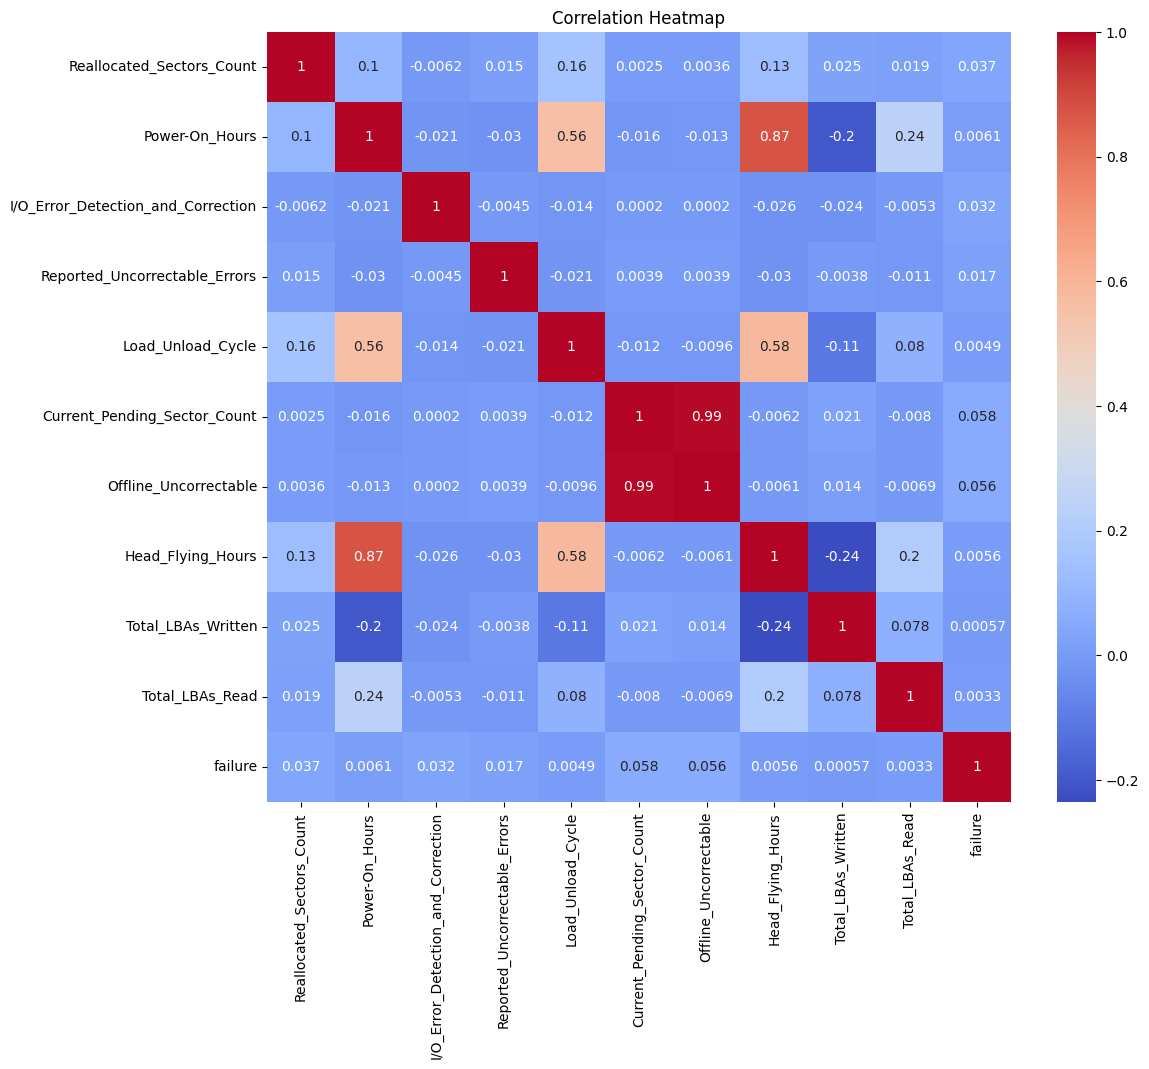

In [24]:
# Create a correlation matrix
corr_matrix = ddf.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()